In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Задание №1. Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов.

In [156]:
data = pd.read_csv('insurance.csv') # Загружаем данные
print('Загруженный датасет:', '\n')
print(data, '\n') # Смотрим на наши данные
print('--------------------------------------------')
print('\n', 'Уникальные регионы из датасета:', '\n')
print(pd.unique(data.region)) # Смотрим уникальные регионы region

Загруженный датасет: 

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns] 

--------------------------------------------

 Уникальные регионы из датасета: 

['southwest' 'southeast' 'northwest' 'northeast']


Задание №2. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy.

In [157]:
groups = data.groupby('region').groups # Делим наш датасет на группы регионов

# Затем добавляем конкретные группы
southwest = data.bmi[groups['southwest']]
southeast = data.bmi[groups['southeast']]
northwest = data.bmi[groups['northwest']]
northeast = data.bmi[groups['northeast']]

# Выполняе ANOVA тест
stats.f_oneway(southwest, southeast, northwest, northeast)

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

Задание №3. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.

In [158]:
model = ols('bmi ~ region', data = data).fit()
anova_results = sm.stats.anova_lm(model, typ = 2)
print(anova_results)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


Задание №4. С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.

In [159]:
# Перебираем все пары регионов
region = ['southwest', 'southeast', 'northwest', 'northeast']
region_pairs = []

for i in range(3):
    for j in range(i + 1, 4):
        region_pairs.append((region[i], region[j]))

# Делаем t критерий Стьюдента для каждой пары
for i, j in region_pairs:
    print(i, j)
    print(stats.ttest_ind(data.bmi[groups[i]], data.bmi[groups[j]]))
    
# Определяем поправку Бонферрони
x = 0.05 / 6 
print('\n', 'Поправка Бонферрони равна:', round(x, 3), '\n')
print('Теперь определим, какие гипотезы мы можем отклонить, а какие принять')
print('Для этого мы будем смотреть, превышает ли поправка Бонферрони p-значение для каждой из пар')
print('Если p-значение пары превышает поправку Бонферрони - гипотеза принимается, иначе она отклоняется', '\n')
print('southwest - southeast, 5.43e-09 < 0.008 ---> гипотеза отклоняется')
print('southwest - northwest, 0.001 < 0.008 ---> гипотеза отклоняется')
print('southwest - northeast, 0.001 < 0.008 ---> гипотеза отклоняется')
print('southeast - northwest, 2.64e-19 < 0.008 ---> гипотеза отклоняется')
print('southeast - northeast, 1.18e-17 < 0.008 ---> гипотеза отклоняется')
print('northwest - northeast, 0.95 > 0.008 ---> гипотеза принимается')

southwest southeast
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
southwest northwest
Ttest_indResult(statistic=3.2844171500398582, pvalue=0.001076958496307695)
southwest northeast
Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072)
southeast northwest
Ttest_indResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19)
southeast northeast
Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
northwest northeast
Ttest_indResult(statistic=0.060307727183293185, pvalue=0.951929170821864)

 Поправка Бонферрони равна: 0.008 

Теперь определим, какие гипотезы мы можем отклонить, а какие принять
Для этого мы будем смотреть, превышает ли поправка Бонферрони p-значение для каждой из пар
Если p-значение пары превышает поправку Бонферрони - гипотеза принимается, иначе она отклоняется 

southwest - southeast, 5.43e-09 < 0.008 ---> гипотеза отклоняется
southwest - northwest, 0.001 < 0.008 ---> гипотеза отклоняется
sout

Задание №5. Выполнить пост-хок тесты Тьюки и построить график.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825   -0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562   -0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------
Как мы можем заметить, судя по столбцу "reject" будет принята только одна группа: northwest - northeast...

 ...которую мы и определили, используя поправку Бонферрони


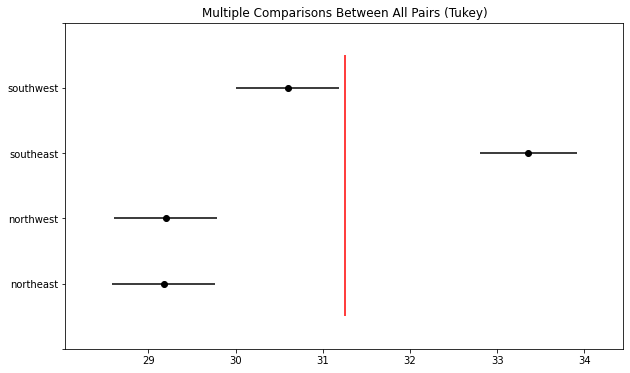

In [160]:
tukey = pairwise_tukeyhsd(endog = data.bmi, groups = data.region, alpha = 0.05)
tukey.plot_simultaneous()
plt.vlines(x = 31.25, ymin = -0.5, ymax = 3.5, color = 'red')
print(tukey.summary())
print('Как мы можем заметить, судя по столбцу "reject" будет принята только одна группа: northwest - northeast...')
print('\n', '...которую мы и определили, используя поправку Бонферрони')

Задание №6. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.

In [161]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data = data).fit()
print(sm.stats.anova_lm(model, type = 2))
print('\n', 'p-значение для эффекта взаимодействия(0.165) > 0.05 ---> говорит нам об отсутсвии значительного эффекта взаимодействия между этими двумя факторами')

                      df        sum_sq      mean_sq          F        PR(>F)
C(region)            3.0   4055.880631  1351.960210  39.602259  1.636858e-24
C(sex)               1.0     86.007035    86.007035   2.519359  1.126940e-01
C(region):C(sex)     3.0    174.157808    58.052603   1.700504  1.650655e-01
Residual          1330.0  45404.154911    34.138462        NaN           NaN

 p-значение для эффекта взаимодействия(0.165) > 0.05 ---> говорит нам об отсутсвии значительного эффекта взаимодействия между этими двумя факторами


Задание №7. Выполнить пост-хок тесты Тьюки и построить график.

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
female / northeast female / northwest  -0.0464    1.0 -2.0142  1.9215  False
female / northeast female / southeast   3.3469    0.0    1.41  5.2839   True
female / northeast female / southwest   0.7362 0.9497 -1.2377    2.71  False
female / northeast   male / northeast  -0.2998 0.9998 -2.2706  1.6711  False
female / northeast   male / northwest  -0.2042    1.0 -2.1811  1.7728  False
female / northeast   male / southeast   4.6657    0.0  2.7634   6.568   True
female / northeast   male / southwest   1.8051 0.1007 -0.1657   3.776  False
female / northwest female / southeast   3.3933    0.0  1.4656   5.321   True
female / northwest female / southwest   0.7825 0.9294 -1.1822  2.7473  False
female / northwest   male / northeast  -0.2534 0.9999 -2.2152  1.7083  False

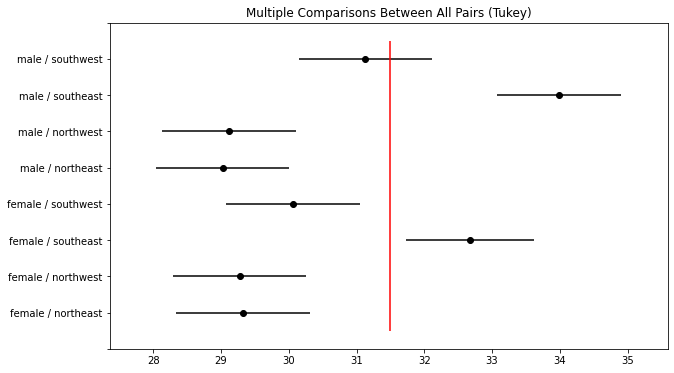

In [162]:
data['combination'] = data.sex + ' / ' + data.region
tukey = pairwise_tukeyhsd(endog = data.bmi, groups = data.combination, alpha = 0.05)
tukey.plot_simultaneous()
plt.vlines(x = 31.5, ymin = -0.5, ymax = 7.5, color = 'red')
print(tukey.summary())